In [1]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


def init(inp, out):
    return np.random.randn(inp, out) / np.sqrt(inp)

def create_architecture(input_layer, first_layer, output_layer, random_seed=0):
    np.random.seed(random_seed)
    layers = X.shape[1], 3 , 1
    arch = list(zip(layers[:-1], layers[1:]))
    weights = [init(inp, out) for inp, out in arch]
    return weights

In [2]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def sigmoid_prime(s):
    return s * (1 - s)

In [3]:
def feed_forward(X, weights):
    a = X.copy()
    out = list()
    for W in weights:
        z = a @ W
        a = sigmoid(z)
        out.append(a)
    return out

In [4]:
def accuracy(true_label, predicted):
    correct_preds = np.ravel(predicted) == true_label
    return np.sum(correct_preds) / len(true_label)

Para corrigir, pega o erro de cada camada e multiplica pela derivada da função de ativiçaõ, afim de se obtem o gradiente (l2_delta). 

In [5]:
def backpropagation(l1, l2, weights, y):
    l2_error = y.reshape(-1, 1) - l2
    l2_delta = l2_error * sigmoid_prime(l2)
    l1_error = l2_delta.dot(weights[1].T)
    l1_delta = l1_error * sigmoid_prime(l1)
    return l2_error, l1_delta, l2_delta

ajustando os pesoss, adcionando eles em cada camada a multiplicação da entrada para elas e as correções delta comom um todo. Executando assim uma descida de gradiente (atravez de pequenos e repetidos passos na direção correta). Alpha é uma contante de regulação (quando mais próximo de 1, mas efeito).

In [6]:
def update_weights(X, l1, l1_delta, l2_delta, weights, alpha=1.0):
    weights[1] = weights[1] + (alpha * l1.T.dot(l2_delta))
    weights[0] = weights[0] + (alpha * X.T.dot(l1_delta))
    return weights

In [7]:
def predict(X, weights):
    _, l2 = feed_forward(X, weights)
    preds = np.ravel((l2 > 0.5).astype(int))
    return preds

## exemplo de uso
Separar esses dois cículos:

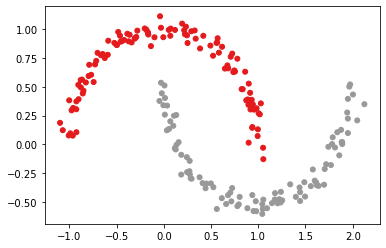

In [8]:
np.random.seed(0)

coord, cl = make_moons(300, noise=0.05)

X, Xt, y, yt = train_test_split(coord, cl, test_size=0.30, random_state=0)
plt.scatter(X[:,0], X[:,1], s=25, c=y, cmap=plt.cm.Set1)

plt.show()

In [9]:
weights = create_architecture(X, 3, 1)

for j in range(30000 + 1):
    # First, feed forward through the hidden layer
    l1, l2 = feed_forward(X, weights)

    # Then, error backpropagation from output to input
    l2_error, l1_delta, l2_delta = backpropagation(l1, l2, weights, y)

    # Finally, updating the weights of the network

    weights = update_weights(X, l1, l1_delta, l2_delta, weights, alpha=0.05)

    # From time to time, reporting the results

    if (j % 5000) == 0:
        train_error = np.mean(np.abs(l2_error))
        print('Epoch {:5}'.format(j), end=' - ')
        print('error: {:0.4f}'.format(train_error), end= ' - ')

        train_accuracy = accuracy(true_label=y, predicted=(l2 > 0.5))
        test_preds = predict(Xt, weights)
        test_accuracy = accuracy(true_label=yt, predicted=test_preds)

        print('acc: train {:0.3f}'.format(train_accuracy), end= ' | ')
        print('test {:0.3f}'.format(test_accuracy))

Epoch     0 - error: 0.5077 - acc: train 0.462 | test 0.656
Epoch  5000 - error: 0.0991 - acc: train 0.952 | test 0.944
Epoch 10000 - error: 0.0872 - acc: train 0.952 | test 0.944
Epoch 15000 - error: 0.0810 - acc: train 0.957 | test 0.956
Epoch 20000 - error: 0.0758 - acc: train 0.967 | test 0.956
Epoch 25000 - error: 0.0730 - acc: train 0.967 | test 0.956
Epoch 30000 - error: 0.0705 - acc: train 0.962 | test 0.956


Matheus, teste outros modelos depois em outro arquivo